In [1]:
import joblib
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 120)

In [2]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred);
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap,vmin=0,vmax=1)
    
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=15) 
#     ax.figure.colorbar(im, ax=ax)
#     ax.tick_params(labelsize=10) 
    
    # We want to show all ticks...
    _ = ax.set_ylabel('True Label', fontsize=20)
    _ = ax.set_xlabel('Predicted Label', fontsize=20)
    _ = ax.set_xticklabels(classes,fontsize=20)
    _ = ax.set_yticklabels(classes,fontsize=20)
    _ = ax.set_title(title, fontsize=22)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes)
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')
     
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",fontsize=15)
    fig.tight_layout()
    
    #fig.savefig('./img.png',dpi = 300)   # save the figure to file
#     plt.close(fig)    # close the figure window
    
    return ax

In [3]:
def plot_freq(df, col, top_classes=20):
    """
    :param df: dataframe
    :param col: list of label string
    :param top_classes: (integer) Plot top labels only.
    """
    sns.set_style('whitegrid')

    col = col
    data = df[~df[col].isnull().any(axis=1)]
    data = data.set_index(col)
    
    # Check out the frequency over each concept.
    freq = pd.DataFrame({
            'freq': data.index.value_counts(normalize=True),
            'count': data.index.value_counts(normalize=False)},
            index=data.index.value_counts(normalize=True).index)
    print('Frequency(Top {})...'.format(top_classes))
    freq = freq[:top_classes]
    display(freq)
    
    # Plot bar chart.
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    _ = freq.plot(y='freq', kind='bar', ax=ax, legend=False, colormap='Set2')
    _ = ax.set_ylabel('frequency', fontsize='x-large')
    _ = ax.set_xticklabels(freq.index.values, rotation=40, ha='right')
    _ = ax.set_title('Frequency over Each Class', fontsize='x-large')

# Table

In [4]:
columnToClassify = 'priority'

In [5]:
df_table_full = pd.read_csv("./resource/maint_order_process.csv",low_memory=False)

In [6]:
df_table_full.shape

(193005, 84)

In [7]:
df_table_full.groupby('priority').size().reset_index(name='count')

,priority,count
0,1,141982
1,2,19733
2,3,17652
3,4,9092
4,5,4546


In [8]:
df_plot = df_table_full.groupby(['priority']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)

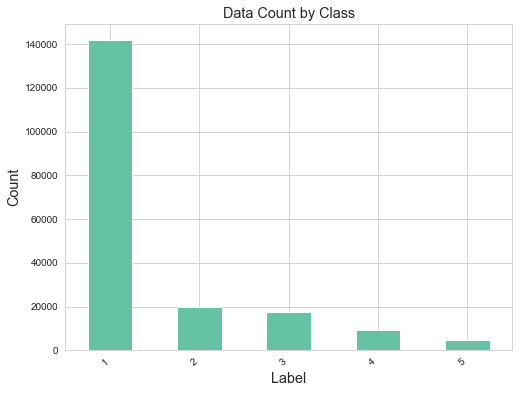

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,1, figsize=(8,6))
_ = df_plot.plot(y='count', kind='bar', ax=ax, legend=False, colormap='Set2')
_ = ax.set_ylabel('Count', fontsize='x-large')
_ = ax.set_xlabel('Label', fontsize='x-large')
_ = ax.set_xticklabels(df_plot.priority.values, rotation=40, ha='right')
_ = ax.set_title('Data Count by Class', fontsize='x-large')

# TOPSIS Result

In [10]:
df_topsis = pd.read_csv('./resource/output_topsis.csv')

In [11]:
df_topsis = df_topsis[df_topsis.col!='priority']

In [12]:
df_topsis.shape

(83, 7)

In [13]:
df_topsis.head()

,col,typevalue,usenull,p_null,p_unique,p_max_row_class,rank_topsis
0,third_loc_id,1.0,1.0,0.033937,0.013533,0.031963,0.979647
1,second_loc_id,1.0,1.0,0.026155,0.003212,0.067071,0.966268
2,cost_center_id,1.0,1.0,0.025989,0.001264,0.068382,0.965746
3,asset_id,1.0,1.0,0.025901,0.051905,0.031693,0.959837
4,asset_group_id,1.0,1.0,0.025901,0.006580,0.089459,0.955425


In [14]:
list_exclude = ['cancel_user_id','origin_doc','prog_year_week_number','maint_order_cancel_reason_id',
                'total_cost','rpn','what','when','who','why','how','maint_order_on_hold_reason_id','performed_worktime',
                'estimated_worktime','performed_asset_downtime','id_mobile','mobile_uuid','rework_cos','index',
                'priority_calculated','maint_req_priority','maint_req_id',
                'user_text','scheduled_to_origin','est_finish_at','scheduled_to','est_finish_at_origin','logged_user_id']

df_exclude = df_table_full

for i in list_exclude:
    try:
        df_exclude = df_exclude.drop(i, axis=1)
    except:
        pass

In [15]:
df_topsis = df_topsis[df_topsis.col.isin(df_exclude.columns)]

In [16]:
df_topsis = df_topsis.reset_index().drop('index',axis=1)

In [17]:
topsis5 = list(df_topsis[:5].col.values)
topsis10 = list(df_topsis[:10].col.values)
topsis15 = list(df_topsis[:15].col.values)
topsis20 = list(df_topsis[:20].col.values)
topsis25 = list(df_topsis[:25].col.values)

In [18]:
# Select columns based in condition
df_select = df_topsis.query("p_null < 0.5 and p_unique < 0.5 and p_max_row_class < 0.8")
manualcols = list(df_select.col.values)

# Normalize Field Priority

In [18]:
min_value = min(list(df_table_full.groupby(['priority']).size()))

priority_values = list(df_table_full.priority.unique())

list_df = []
for i in priority_values:
    df_aux = df_table_full.query(f"priority=={str(i)}")
    df_aux = df_aux.sample(frac=1).reset_index(drop=True)
    df_aux = df_aux[:min_value]
    list_df.append(df_aux)
    
for t in list_df:
    print(t.shape)

(4546, 84)
(4546, 84)
(4546, 84)
(4546, 84)
(4546, 84)


In [19]:
# Use Table Normalized or Table Raw
# df_table = pd.concat(list_df)
df_table = df_table_full

In [20]:
df_table_backup = df_table.copy()

In [21]:
print('Field Labels ', df_table[columnToClassify].unique())
print('Table Thape ',df_table.shape)

Field Labels  [1 3 5 2 4]
Table Thape  (193005, 84)


# Choose Dataframe

In [22]:
"""
Options 
------
topsis5 topsis10 topsis15 topsis20 topsis25 manualcols
"""
df_table = df_table_backup[[columnToClassify,*topsis25]]

In [23]:
df_table.head()

,priority,third_loc_id,second_loc_id,cost_center_id,asset_id,asset_group_id,first_loc_id,area_id,employee_id,employee_team_id,maint_plan_id,maint_service_type_id,maint_service_nature_id,asset_part_id,operator_team_id,damage_type_id,asset_part_child_id,component_id,maint_failure_id,maint_cause_id,maint_action_id,cause_type_id,cause_countermeasure_id,cause_feature_id,breakdown_typology_id,maint_possible_cause_id
0,1,NaN,350.0,38.0,7399.0,113.0,349.0,3,NaN,5.0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,350.0,38.0,7399.0,113.0,349.0,3,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,106.0,18.0,15.0,379.0,59.0,13.0,2,5.0,3.0,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,326.0,238.0,22.0,7161.0,112.0,231.0,4,NaN,NaN,NaN,4,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,335.0,239.0,22.0,7191.0,112.0,231.0,4,NaN,NaN,NaN,4,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# df_table.hist()
# plt.show()

In [25]:
previsores = df_table.drop(columnToClassify, axis=1)
classe = df_table[[columnToClassify]]

previsores_names = list(df_table.drop(columnToClassify, axis=1).columns)
class_names = df_table[columnToClassify].unique().astype(str)

In [26]:
_,cols = previsores.shape

# Features Transform

In [27]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
for i in previsores.columns:
    previsores[i] = labelencoder_previsores.fit_transform(previsores[i])

labelencoder_classe = LabelEncoder()
classe[columnToClassify] = labelencoder_classe.fit_transform(classe[columnToClassify])

C:\Users\GREGO\AppData\Local\conda\conda\envs\PIBITI\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Test OneHotEncoder

# Split Dataset

In [28]:
from sklearn.model_selection import train_test_split

previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores, 
                                                                                classe,
                                                                                test_size=0.30,
                                                                                random_state=0)

In [29]:
X_test = previsores_test 
y_test = classe_test

# Smote

In [247]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(previsores_train, classe_train)
print( np.bincount(y_train) )

In [30]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train, y_train = nr.fit_sample(previsores_train, classe_train)
print( np.bincount(y_train) )

[3199 3199 3199 3199 3199]


# Test Varius Algorithms

In [267]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [281]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
    #GLM
#     linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model. RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [282]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    print(alg.__class__.__name__)
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
#     fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
#     MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(X_test, predicted)
#     MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(X_test, predicted)
#     MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    

AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
KNeighborsClassifier
DecisionTreeClassifier


In [283]:
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy
3,GradientBoostingClassifier,0.7290,0.4972
4,RandomForestClassifier,0.9859,0.4945
1,BaggingClassifier,0.9855,0.4889
0,AdaBoostClassifier,0.5392,0.4722
6,DecisionTreeClassifier,1.0000,0.4276
2,ExtraTreesClassifier,1.0000,0.3733
5,KNeighborsClassifier,0.7382,0.2307


# Verify ML Code

In [256]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

X = X_train
Y = y_train

seed = 7

models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('GBC', GradientBoostingClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier()))

# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.190266 (0.130446)
CART: 0.349305 (0.156191)
NB: 0.287112 (0.219584)
RFC: 0.355749 (0.174184)
GBC: 0.342113 (0.119975)
ADA: 0.206260 (0.131574)


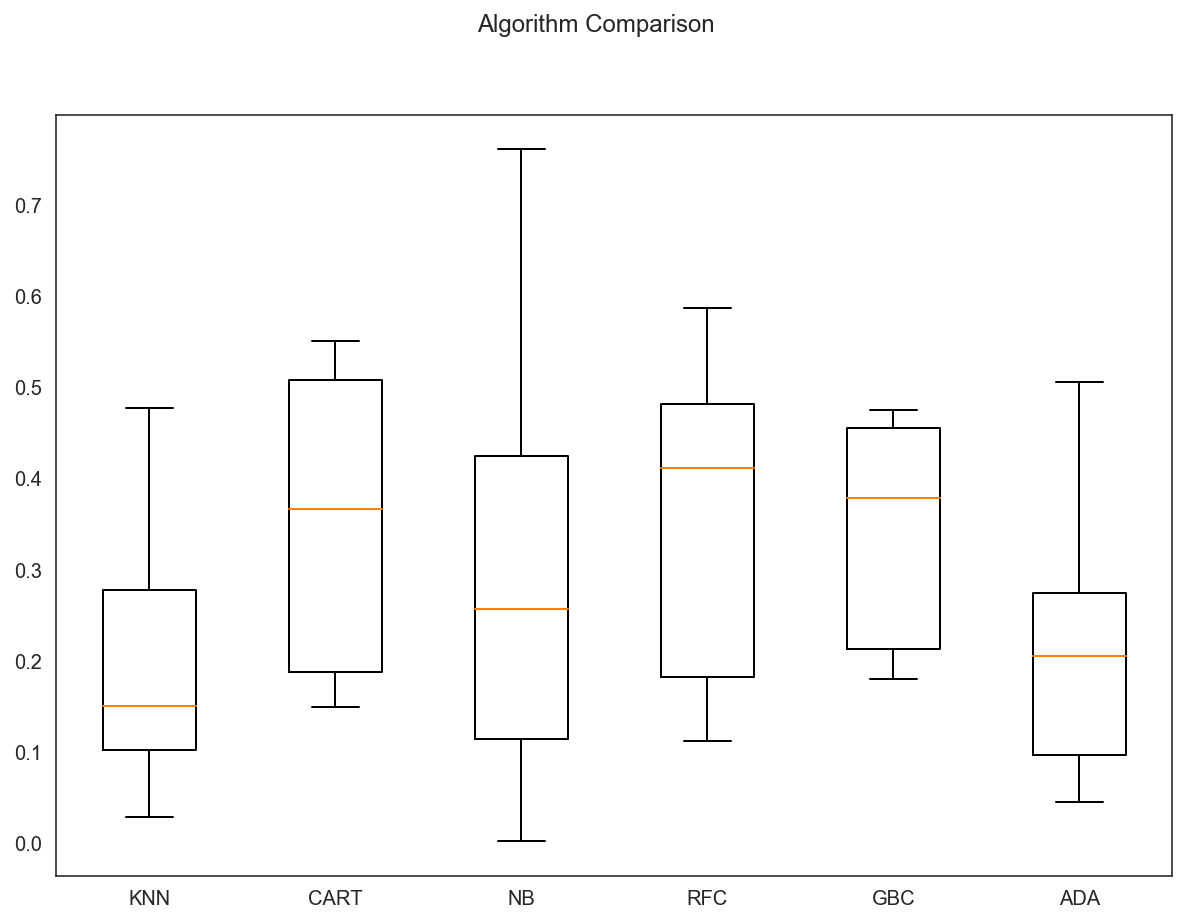

In [257]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# ax.set_ylim(ymin=0,ymax=1)
plt.show()

# ML Code

In [32]:
# from sklearn.naive_bayes import GaussianNB
# classificador = GaussianNB()

# from sklearn.tree import DecisionTreeClassifier, export
# classificador = DecisionTreeClassifier(criterion='entropy')

# from sklearn.svm import SVC
# classificador = SVC(kernel='rbf',random_state=1,gamma='auto')

# from sklearn.neighbors import KNeighborsClassifier
# classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=4)

# from sklearn.neural_network import MLPClassifier
# classificador = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=100);

previsores_train = X_train
classe_train = y_train
classificador.fit(previsores_train,classe_train)
previsoes = classificador.predict(previsores_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

accuracy = accuracy_score(classe_test, previsoes, normalize = True)
# precision = precision_score(classe_test, previsoes, average="macro")
matriz = confusion_matrix(classe_test, previsoes)
class_report = classification_report(classe_test, previsoes)

print("Accuracy:", accuracy)
# print("Precision:", precision)

Accuracy: 0.5251632067976927


In [34]:
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.47      0.63     42505
           1       0.29      0.71      0.41      5967
           2       0.58      0.50      0.53      5419
           3       0.24      0.88      0.38      2664
           4       0.13      0.77      0.23      1347

    accuracy                           0.53     57902
   macro avg       0.44      0.67      0.44     57902
weighted avg       0.80      0.53      0.58     57902



Normalized confusion matrix


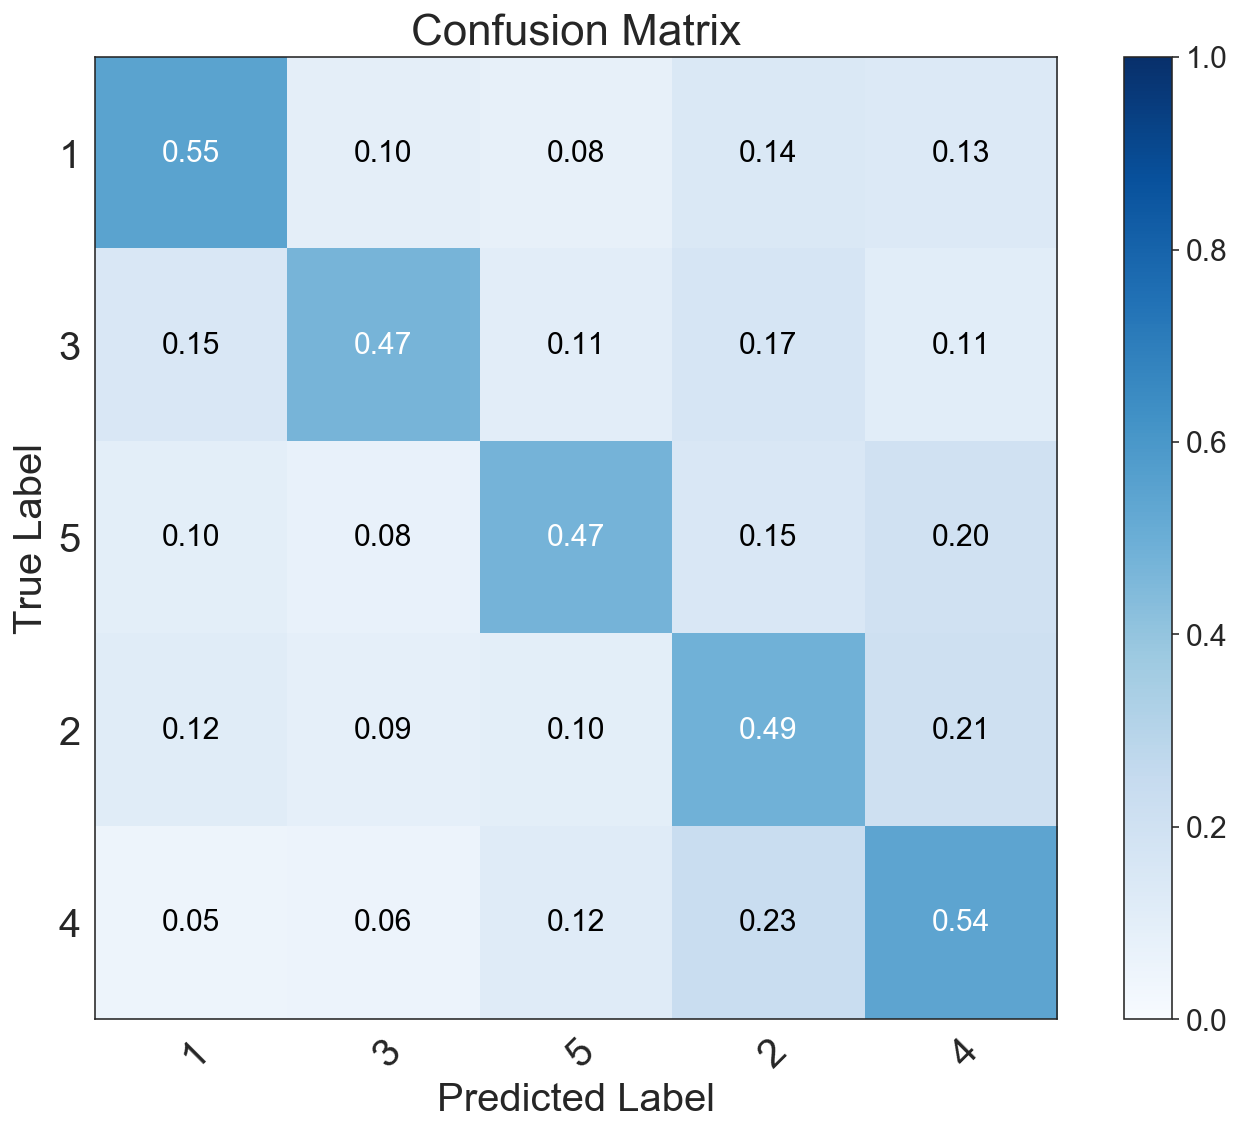

In [68]:
%config InlineBackend.figure_format ='retina'
sns.set_style("white")
np.set_printoptions(precision=4)
# Plot non-normalized confusion matrix
plot_confusion_matrix(classe_test, previsoes, classes=class_names,normalize=True,title='Confusion Matrix' )

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10);
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(previsores_train,classe_train);
# y_pred=rfc.predict(X_test)

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=previsores_names).sort_values(ascending=False);

plt.rcParams['figure.figsize']=(10,10)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# With CSV Evaluation

In [41]:
import pandas as pd

pathFile = './base_manusis/evaluation/maint_order.csv'

df_eval = pd.read_csv(pathFile, delimiter=';')

print('before',df_eval.shape)

df_eval = df_eval[df_table.columns]

print('after',df_eval.shape)

df_eval = df_eval.fillna(0)

before (100, 118)
after (100, 6)


In [43]:
df_eval.groupby('priority').size().reset_index(name='count')

,priority,count
0,1,56
1,2,32
2,3,12


In [44]:
df_eval.loc[[1]]

,priority,third_loc_id,second_loc_id,cost_center_id,asset_id,asset_group_id
1,1,3486,3057,283,32897,2536


In [45]:
previsores_eval = df_eval.drop(columnToClassify, axis=1)
classe_eval = df_eval[[columnToClassify]]

previsores_names_eval = list(df_eval.drop(columnToClassify, axis=1).columns)
class_names_eval = df_eval[columnToClassify].unique().astype(str)

In [46]:
_,cols = previsores_eval.shape

In [47]:
from sklearn.preprocessing import LabelEncoder

labelencoder_previsores = LabelEncoder()
for i in previsores_eval.columns:
    previsores_eval[i] = labelencoder_previsores.fit_transform(previsores_eval[i])

labelencoder_classe = LabelEncoder()
classe_eval[columnToClassify] = labelencoder_classe.fit_transform(classe_eval[columnToClassify])

C:\Users\GREGO\AppData\Local\conda\conda\envs\PIBITI\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
previsoes_eval = classificador.predict(previsores_eval)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

precisao_eval = accuracy_score(classe_eval, previsoes_eval)
matriz_eval = confusion_matrix(classe_eval, previsoes_eval)
class_report_eval = classification_report(classe_eval, previsoes_eval)
    
print('precision:', precisao_eval)

precision: 0.13


In [63]:
matriz_eval

array([[ 6,  3, 46,  1],
       [16,  6,  5,  5],
       [11,  0,  1,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [64]:
print(class_report_eval)

              precision    recall  f1-score   support

           0       0.18      0.11      0.13        56
           1       0.67      0.19      0.29        32
           2       0.02      0.08      0.03        12
           4       0.00      0.00      0.00         0

    accuracy                           0.13       100
   macro avg       0.22      0.09      0.11       100
weighted avg       0.32      0.13      0.17       100



In [54]:
set(list(classe_eval.priority.unique()))

{0, 1, 2}

In [52]:
set(previsoes_eval)

{0, 1, 2, 4}